# **Análise de dados da Monkeypox no Brasil e no Mundo**

**1) Analisando a monkeypox no cenário mundial:**



In [ ]:
#Importando o pandas:

import pandas as pd

#Importando o conjunto de dados:

mp_mundo = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/jonates/opendata/master/monkeypox/owid_monkeypox_data_20220815.csv',
    sep = ',',
    decimal = '.'
)

**2) Estrutura do conjunto de dados**




In [ ]:
mp_mundo.head(10)

,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Andorra,2022-07-25,1.0,NaN,1.0,12.653,12.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,2022-07-26,2.0,NaN,3.0,25.306,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andorra,2022-07-27,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,2022-07-28,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2022-07-29,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Andorra,2022-07-30,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,2022-07-31,0.0,0.43,3.0,0.000,37.958,5.441,NaN,NaN,NaN,NaN,NaN,NaN
7,Andorra,2022-08-01,0.0,0.29,3.0,0.000,37.958,3.669,NaN,NaN,NaN,NaN,NaN,NaN
8,Andorra,2022-08-02,0.0,0.00,3.0,0.000,37.958,0.000,NaN,NaN,NaN,NaN,NaN,NaN
9,Andorra,2022-08-03,0.0,0.00,3.0,0.000,37.958,0.000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Analisando o tipo das estruturas dos dados:

mp_mundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         3909 non-null   object 
 1   date                             3909 non-null   object 
 2   new_cases                        3909 non-null   float64
 3   new_cases_smoothed               3464 non-null   float64
 4   total_cases                      3909 non-null   float64
 5   new_cases_per_million            3909 non-null   float64
 6   total_cases_per_million          3909 non-null   float64
 7   new_cases_smoothed_per_million   3464 non-null   float64
 8   new_deaths                       143 non-null    float64
 9   new_deaths_smoothed              124 non-null    float64
 10  total_deaths                     143 non-null    float64
 11  new_deaths_per_million           143 non-null    float64
 12  total_deaths_per_mil

In [ ]:
#Transformando o conjunto de dados:

mp_mundo['date']=pd.to_datetime(mp_mundo['date'], infer_datetime_format=True)


In [ ]:
mp_mundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         3909 non-null   object        
 1   date                             3909 non-null   datetime64[ns]
 2   new_cases                        3909 non-null   float64       
 3   new_cases_smoothed               3464 non-null   float64       
 4   total_cases                      3909 non-null   float64       
 5   new_cases_per_million            3909 non-null   float64       
 6   total_cases_per_million          3909 non-null   float64       
 7   new_cases_smoothed_per_million   3464 non-null   float64       
 8   new_deaths                       143 non-null    float64       
 9   new_deaths_smoothed              124 non-null    float64       
 10  total_deaths                     143 non-null    float64    

**3) Visualização da Monkeypox no mundo:**



In [ ]:
# Analisando o primeiro registro da doença no mundo:

mp_mundo.date.min()

Timestamp('2022-05-06 00:00:00')

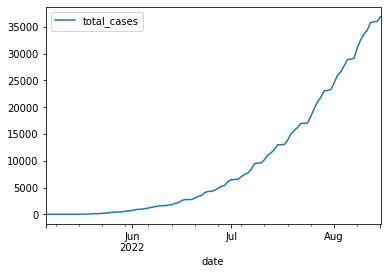

In [ ]:
# Evolução da monkeypox no mundo:

mp_mundo.query('location=="World"').plot.line('date', 'total_cases')

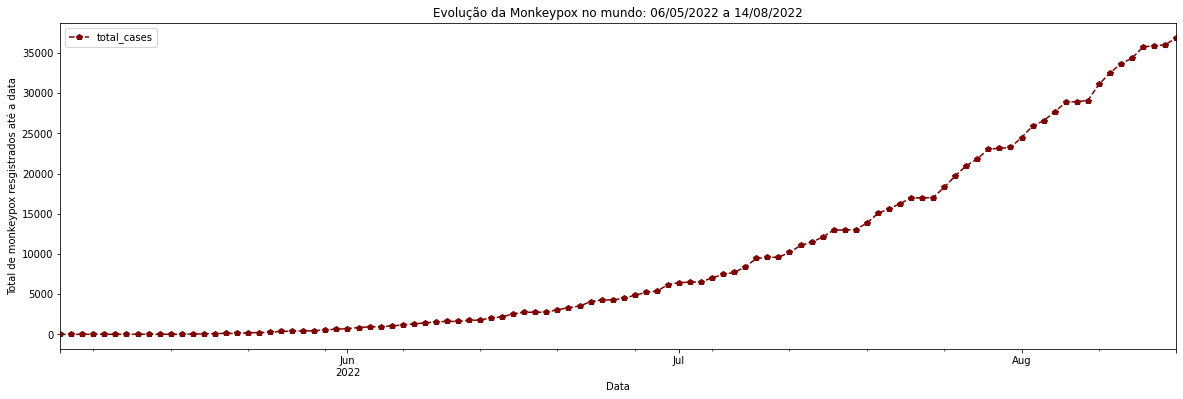

In [ ]:
#Customização do gráfico:

mp_mundo\
  .query('location == "World"')\
  .plot.line(
      x='date',
      y='total_cases',
      color='maroon',
      marker='p',
      linestyle = '--',
      figsize=(20,6),
      title='Evolução da Monkeypox no mundo: 06/05/2022 a 14/08/2022',
      ylabel='Total de monkeypox resgistrados até a data',
      xlabel='Data'
  );

Nota-se que os dados estão em crescimento exponencial desde que iniciaram seu registro em maio de 2022. Até a presente data, já são aproximadamente 35 mil casos registrados.

**4) Casos de Monkeypox no mundo:**

In [ ]:
#verificando os países que já tiveram casos de monkeypox:

paises_com_monkeypox=pd.unique(mp_mundo['location'])
print(paises_com_monkeypox)

['Andorra' 'Argentina' 'Australia' 'Austria' 'Barbados' 'Belgium' 'Benin'
 'Bermuda' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cameroon' 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Congo'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Estonia' 'Finland' 'France'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Latvia' 'Lebanon' 'Liberia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico'
 'Moldova' 'Monaco' 'Montenegro' 'Morocco' 'Netherlands' 'New Caledonia'
 'New Zealand' 'Nigeria' 'Norway' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Puerto Rico' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'South Korea'
 'Spain' 'Sudan' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand' 'Turkey'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uruguay

In [ ]:
#quantidade de países (retirando os dados acumulados - world)

len(paises_com_monkeypox) - 1

88

Já ha casos de monkeypox em 88 países do globo, sendo que isso representa 45 % dos países do mundo.

In [ ]:
#Casos acumulados por países:

tab_casos_por_pais = mp_mundo\
  .query('location !="World"')\
  .filter(items = ['location','new_cases'])\
  .groupby('location', as_index = True)\
  .agg({"new_cases":"sum"})\
  .reset_index()\
  .rename(columns={'new_cases':'total_cases'})\
  .sort_values('total_cases',ascending=False)

#Verificando os 10 países com mais casos:

tab_casos_por_pais.head(10)

,location,total_cases
85,United States,11843.0
76,Spain,5719.0
30,Germany,3142.0
84,United Kingdom,3023.0
10,Brazil,2893.0
28,France,2663.0
13,Canada,1058.0
55,Netherlands,1025.0
61,Peru,775.0
64,Portugal,770.0


Os 5 países com mais casos são: EUA, Espanha, Alemanha, Reino Unido e Brasil.

In [ ]:
#Importando a biblioteca Altair:

import altair as alt

# Customizando o gráfico de barras:

barras=alt.Chart(
    data=tab_casos_por_pais.head(10),
    width=400,
    height=300,
    title = 'Países com mais casos de Monkeypox: 14/08/2022.'
  ).mark_bar()\
  .encode(
      y=alt.Y(
          shorthand = 'total_cases:Q',
          scale=alt.Scale(domain=(0, 12000)),
          axis=alt.Axis(title = 'Total de casos registrados')
      ),
      x=alt.X(
          shorthand = "location:O",
          sort = '-y',
          axis=alt.Axis(title='País')
      )
)

#Definindo os rótulos

textos=barras.mark_text(
    align='center',
    baseline='top',
    dy=4,
    color='black',
    fontStyle='bold',
    fontSize=12,
).encode(text='total_cases:Q') 

#Confeccionando o gráfico de barras:

(barras+textos).configure_mark(opacity=0.8, color='orange')


alt.LayerChart(...)

Analisando graficamente, nota-se que os EUA apresentam mais que o dobro de casos que o segundo colocado (Espanha). Os países que ocupam as sucessivas posições, apresentam um decréscimo no número de casos de forma mais suave.

**5) Óbitos por Monkeypox no mundo:**

In [ ]:
#Óbitos por Monkeypox no mundo até dia 14/08/2022

mp_mundo\
  .query('location != "World"')\
  .filter(items=['new_deaths'])\
  .sum()

new_deaths    11.0
dtype: float64

In [ ]:
#Óbitos por país:

tab_obitos_por_pais = mp_mundo\
  .query('location != "World"')\
  .groupby('location', as_index = True)\
  .agg({"new_deaths":"sum"})\
  .reset_index()\
  .rename(columns={'new_deaths':'total_deaths'})\
  .sort_values('total_deaths', ascending = True)\
  .query('total_deaths != 0')

tab_obitos_por_pais  



,location,total_deaths
10,Brazil,1.0
31,Ghana,1.0
25,Ecuador,1.0
38,India,1.0
61,Peru,1.0
76,Spain,2.0
58,Nigeria,4.0


Analisando os óbitos graficamente:

In [ ]:
#Biblioteca Bokeh

import bokeh.io
import bokeh.plotting

#Visualização de gráficos gerados pelo Bokeh em notebooks
bokeh.io.output_notebook()

In [ ]:
#Ajustando as configurações principais dos gráficos:

graf_obitos_por_pais= bokeh.plotting.figure(
    title = "Total de óbitos por Monkeypox, por país, em 14/08/2022.",
    width= 600,
    height=400,
    x_axis_label ="Total de óbitos registrados",
    y_axis_label = "País",
    x_range=(0,5),
    y_range=list(tab_obitos_por_pais['location'])
)

#Confeccionando o gráfico de barras:
graf_obitos_por_pais.hbar(
    y=tab_obitos_por_pais['location'],
    right = tab_obitos_por_pais['total_deaths'],
    height=0.9,
    line_color="darkblue",
    line_width=2,
    fill_color="blue"
)

#Inserindo textos:

graf_obitos_por_pais.text(
    x=tab_obitos_por_pais['total_deaths']+0.1,
    y=tab_obitos_por_pais['location'],
    text=tab_obitos_por_pais['total_deaths'],
    text_font_style='bold',
    text_color="black",
    text_font_size={'value':'12px'}
)

#Gráfico de linhas com marcadores:

bokeh.io.show(graf_obitos_por_pais)

A Nigéria é o país com maior número de óbitos (4), seguido de Espanha (2). 
Embora os EUA estejam em primeiro lugar com relação ao número de casos, não há número de óbitos registrados neste país. Isso mostra que a Monkeypox é uma doença com baixa taxa de mortalidade, quando comparada a outras doenças, como a COVID-19. Além disso, já existem vacinas que tratam da varíola comum e que também servem como antídoto para a Monkeypox, o que corrobora a baixa taxa de mortalidade da doença.

**6)Comparando a evolução da doença em alguns países:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


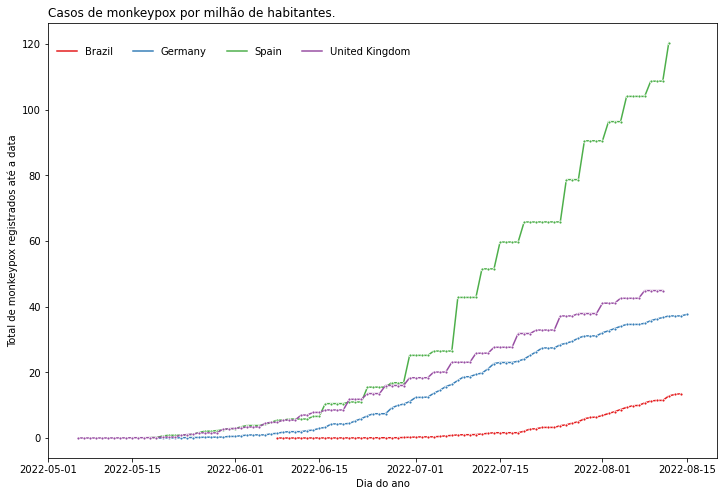

In [ ]:
#Ajustanto o tamanho da figura:

fig,ax=plt.subplots(figsize=(12,8))

#Confeccionando o gráfico:

ax=sns.lineplot(
    #data=mp_mundo.query('(location==["United States") | (loaction ==["Spain") | (location=="Germany") | (location == "United Kingdom") | (location == "Brazil")'),
    data=mp_mundo.query('location==["United Satate", "Spain", "Germany", "United Kingdom", "Brazil"]'),
    x="date",
    y="total_cases_per_million",
    hue='location',
    palette='Set1',
    marker='.'
)

#Inserindo o título:
ax.set_title('Casos de monkeypox por milhão de habitantes.', loc = 'left')

#Inserindo o rótulo dos eixos:

plt.xlabel("Dia do ano")
plt.ylabel("Total de monkeypox registrados até a data")

#Ajustando a legenda:

plt.legend(
    title=' ', 
    loc='upper left',
    #mode= "expand",
    ncol=5,
    frameon=False
)

plt.show()


A Espanha apresenta um crescimento acelerado da doença, enquanto que Reino Unido, Alemanha e Brasil apresentam curvas de crescimento mais suaves.

# **Monkeypox no Brasil**

In [ ]:
#Importando a biblioteca pandas:

import pandas as pd

In [ ]:
#Importando o conjunto de dados:
mp_brasil = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/monkeypox/monkeypox_brasil_20220813.csv',
    sep = ';'
)

**Estrutura do conjunto de dados:**

In [ ]:
mp_brasil.head(10)

,NM_REGIAO,NM_ESTADO,CD_GEOCUF,casos_confirmados,casos_suspeitos,obitos
0,SUDESTE,MINAS GERAIS,31,133,493,1
1,SUDESTE,ESPÍRITO SANTO,32,8,29,0
2,SUDESTE,RIO DE JANEIRO,33,314,429,0
3,SUDESTE,SÃO PAULO,35,2019,1086,0
4,SUL,SANTA CATARINA,42,22,151,0
5,SUL,PARANÁ,41,62,95,0
6,SUL,RIO GRANDE DO SUL,43,34,133,0
7,CENTRO-OESTE,GOIÁS,52,60,252,0
8,CENTRO-OESTE,DISTRITO FEDERAL,53,100,114,0
9,CENTRO-OESTE,MATO GROSSO DO SUL,50,10,16,0


In [ ]:
#Estrutura do conjunto de dados:

mp_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NM_REGIAO          27 non-null     object
 1   NM_ESTADO          27 non-null     object
 2   CD_GEOCUF          27 non-null     int64 
 3   casos_confirmados  27 non-null     int64 
 4   casos_suspeitos    27 non-null     int64 
 5   obitos             27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


**Visualização dos dados da Monkeypox no Brasil:**

**a) casos confirmados e suspeitos por UF em 13/08/22 no Brasil:**

In [ ]:
mp_brasil.casos_confirmados.sum(), mp_brasil.casos_suspeitos.sum()

(2847, 3429)

In [ ]:
mp_brasil.casos_confirmados.sum() + mp_brasil.casos_suspeitos.sum()

6276

In [ ]:
#Criando o Dataframe:

mp_casos_uf= pd.DataFrame(
    data= {
        'situacao':['suspeitos','confirmados'],
        'casos_registrados':[mp_brasil.casos_suspeitos.sum(),mp_brasil.casos_confirmados.sum() ]
    }

)

mp_casos_uf

,situacao,casos_registrados
0,suspeitos,3429
1,confirmados,2847


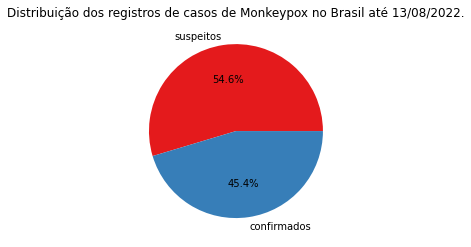

In [ ]:
#confeccionando o gráfico:

plt.pie(
    x= mp_casos_uf.casos_registrados,
    labels = mp_casos_uf.situacao,
    colors = sns.color_palette('Set1'),
    autopct='%.1f%%',
)

#Título:

plt.title('Distribuição dos registros de casos de Monkeypox no Brasil até 13/08/2022.');

plt.show()

**Casos confirmados de Monkeypox no Brasil por região:**

In [ ]:
#Casos por região:

tab_casos_por_regiao = mp_brasil\
  .groupby('NM_REGIAO', as_index = True)\
  .agg({"casos_confirmados":"sum"})\
  .reset_index()\
  .sort_values('casos_confirmados', ascending = False)

tab_casos_por_regiao  

,NM_REGIAO,casos_confirmados
3,SUDESTE,2474
0,CENTRO-OESTE,174
4,SUL,118
1,NORDESTE,69
2,NORTE,12


In [ ]:
#Importando a biblioteca plotly:

import plotly.express as px


In [ ]:
#Confeccionando o gráfico de barras:

grafico_barras = px.bar(
    data_frame = tab_casos_por_regiao,
    y = 'NM_REGIAO',
    x = 'casos_confirmados',
    orientation = 'h',
    title= 'Casos confirmados de Monkeypox por Região do Brasil em 13/08/2022.',
    height = 600,
    width = 600,
    labels = {
        'NM_REGIAO':'Grande Região',
        'casos_confirmados':'Casos de Monkeypox confirmados'
    },
    template = 'plotly_white',
    text_auto=True
)

grafico_barras.update_layout(yaxis={'categoryorder':'total ascending'})

grafico_barras.update_traces(
    marker_color='purple',
    marker_line_color = 'black',
    marker_line_width=0.5,
    opacity=0.9
)

grafico_barras.show()

A região Sudeste é a que apresenta maior número de casos. Isso se deve ao fato de que é a região mais populosa do país. Sendo assim, o número de casos é proporcional à população desses estados.

**Mapa dos casos confirmados de Monkeypox no Brasil por UF até 13/08/2022**

**Carregando o arquivo com dados geoespaciais**

In [ ]:
!wget --verbose --show-progress --no-check-certificate https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json

--2022-08-23 22:38:31--  https://raw.githubusercontent.com/jonates/opendata/master/arquivos_geoespaciais/unidades_da_federacao.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123654 (121K) [text/plain]
Saving to: ‘unidades_da_federacao.json’

unidades_da_federac 100%[===================>] 120.76K  --.-KB/s    in 0.03s   

2022-08-23 22:38:31 (4.39 MB/s) - ‘unidades_da_federacao.json’ saved [123654/123654]



In [ ]:
#Importando a Json

import json

In [ ]:
#Abrindo o JSON e guardando em um objeto:

objeto_geo_uf=open('/content/unidades_da_federacao.json',)

In [ ]:
#Lendo o arquivo georreferenciado no formato JSON:

geo_uf=json.load(objeto_geo_uf)

In [ ]:
#Observando a estrutura do json:
geo_uf['features'][6]



{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-48.20054439299997, -15.500255152999962],
    [-47.41733820999994, -15.500256607999994],
    [-47.322160931999974, -15.598471616999952],
    [-47.3125601629999, -15.73990848599994],
    [-47.378837711999935, -15.884151574999947],
    [-47.308386986999935, -16.050264260999967],
    [-48.27860601199998, -16.05026116599989],
    [-48.28565984899991, -15.84452858099997],
    [-48.21747172599998, -15.762279238999941],
    [-48.20054439299997, -15.500255152999962]]]},
 'properties': {'NM_ESTADO': 'DISTRITO FEDERAL',
  'NM_REGIAO': 'CENTRO-OESTE',
  'CD_GEOCUF': '53'}}

**Confeccionando o mapa da taxa de mortalidade**

In [ ]:
#Analisando a estrutura:

mp_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NM_REGIAO          27 non-null     object
 1   NM_ESTADO          27 non-null     object
 2   CD_GEOCUF          27 non-null     int64 
 3   casos_confirmados  27 non-null     int64 
 4   casos_suspeitos    27 non-null     int64 
 5   obitos             27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [44]:
#Confeccionando o mapa:

mapa_monkeypox = px.choropleth_mapbox(
    data_frame = mp_brasil, 
    geojson = geo_uf,
    locations = 'NM_ESTADO',
    featureidkey='properties.NM_ESTADO',
    color='casos_confirmados',
    color_continuous_scale='reds',
    #color_continuous_scale=px.colors.diverging.RdBu_r,
    #color_continuous_midpoint = 2,
    range_color=(0,350),
    mapbox_style="open-street-map",
    zoom=2.5,
    center={"lat":-17.14, "lon": -57.33},
    opacity=1,
    labels = {'casos_confirmados':'Casos confirmados',
              'NM_ESTADO':'Unidade da Federação'
    },
    width = 1000,
    height=800,
    title='Casos confirmados de Monkeypox'

)

In [45]:
#Fazendo alguns ajustes no mapa:

mapa_monkeypox.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0 })

mapa_monkeypox.update_layout(coloraxis_showscale=False)

mapa_monkeypox.update_traces(marker_line_width=1.0)

mapa_monkeypox.show()

Analisando o gráfico é possível observar que os estados da região Sudeste têm maior número de casos do que o restante do país, como observado no gráfico de barras anterior. São Paulo é o estado com mais casos (2019), seguido por Rio de Janeiro (314) e Minas Gerais (133). Os estados da região norte são os que tem menor incidência da doença, pois nessa região a taxa de povoamento é baixa.